# Perceptron

So one of the first attempts at using a machine learning algorithm to classify data into categories is the **perceptron**. With it we can take some input with known output labels and then build a classifier to neatly separate the data. For example, consider the following data. We generate some linearly separable data which can be classified into two distinct categories.

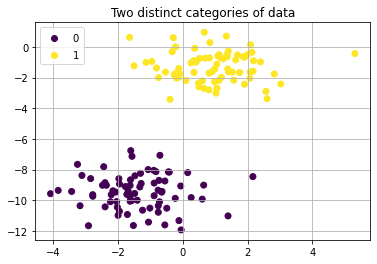

In [110]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from itertools import product

# Machine Learning
from sklearn.linear_model import Perceptron


# Generate some linearly separable data. This corresponds
# to two distinct categories

X_lin, y_lin = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )

# Create a utility plot function

def plotter(X,y):
    scatter = plt.scatter(X[:,0],X[:,1],c=y)
    plt.title("Two distinct categories of data")
    plt.legend(*scatter.legend_elements())
    plt.grid()
    
plotter(X_lin, y_lin)

Can we come up with a way to accurately predict which category (0 or 1) a chosen dot belongs to? In this case yes because this data is clearly linearly separable. However, one notable weakness of Perceptrons is that they will not offer a solution to data which is not linearly separable.
So a perceptron would have problems with the following data. 

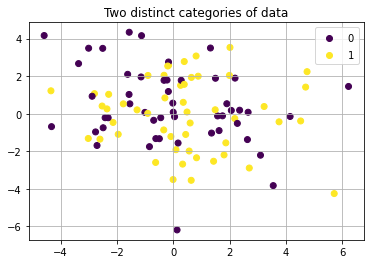

In [111]:
# Make some data that is not linearly separable

(X_nonlin, y_nonlin) = datasets.make_circles(100,noise=2.0,random_state=10)
plotter(X_nonlin, y_nonlin)

## Common Methods

As you know from your previous Machine Learning work, there a number of methods you could implement here. As an example, let's try out a logistic regression model on this data although I wouldn't expect it to do very well since there does not seem a clear path to discriminating between the two classes. But Logistic Regression would still complete and provide an estimate whereas a perceptron would not.

In [327]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Let's create a generic fitter function that will allow us to 
# fit different methods:

def fitter(X,y,method,tag):
    clf = make_pipeline(StandardScaler(), method)
    clf.fit(X, y)
    print(f"Training accuracy of {tag} is: {clf.score(X,y)}")


In [328]:
# Fit a Logistic Regression
fitter(X_nonlin, y_nonlin, LogisticRegression(),"LR")

# Fit a RandomForest
fitter(X_nonlin, y_nonlin, RandomForestClassifier(n_estimators=5),"RF")

Training accuracy of LR is: 0.54
Training accuracy of RF is: 0.96


Now let's try these on the linear separable data

In [329]:
fitter(X_lin, y_lin, LogisticRegression(),"LR")

# Fit a RandomForest
fitter(X_lin, y_lin, RandomForestClassifier(n_estimators=5),"RF")

Training accuracy of LR is: 1.0
Training accuracy of RF is: 1.0


## Back To The Perceptron

So let's see if we can use a neural network, or a primitive version thereof, to accurately make distinctions between the two categoies in the above datasets. To do this, we'll need to take a step back into the past to look at the beginnings of neural networks. There are some key concepts here that might be useful to know as you acquire a foundational knowledge of Deep Learning. You probably already know that the neuron has inpsired thinking and intuition when it comes to building neural networks although this only goes so far. But let's check it out.

<img src="./PICS/01_neuron.png" style="height: 500px;">

| Biology | Perceptron | 
| :- | -: | 
| Biological Neuron | Artifical Neuron|
| Cell Nucleus | Node |
| Dendrites | Input |
| Synapse | Weights / Connections |
| Axon | Output |


https://en.wikipedia.org/wiki/Neuron

https://www.simplilearn.com/tutorials/deep-learning-tutorial/perceptron


## Perceptron History

The idea of a perceptron is not new. It's pretty old in fact, well relatively speaking, having been conceived in 1943 by McCulloch and Pitts with an implementation there of in 1958 by Rosenblatt. It's important to note that the first intention behind the Perceptron was as an actual computing device for use in image recognition. Further considerations (and possible extensions) of the perceptron were presented in 1969, by Minsky and Papert. Despite the interest in having a hardware device to implement the perceptron, it was also implemented in software on a rather large IBM "mainframe". Its purpose was to perform image recognition.

<img src="./PICS/06_perceptron.png" style="height: 300px;">


The initial optimism surrounding the perceptron was considerable though a major weakness involved its inability to deal with data that was not linearly separable. This limited its application and subsequently dampened interest in neural networks for many years before later researchers realized that a perceptron could be enhanced by supplementing it with additional "hidden" layers which would allow it to deal with the linear seprabale issue. Moreover, as computing power increased and became more widely available, researchers began to conduct more experiments with such networks which brought us into an era of enthusiasm and interest in neural networks. 

Let's investigate the ideas and intution behind the perceptron to better understand what it originally promised, where it excelled and where it fell short. Remember form above that we would like to be able to accurately separate label data into their indicated categories. So with the following data it seems like we could find some way to discriminate between the purple group (0 label) and the gold group (1 label). Data is rarlely this clean but we are trying to understand things so we'll be simple at first. 

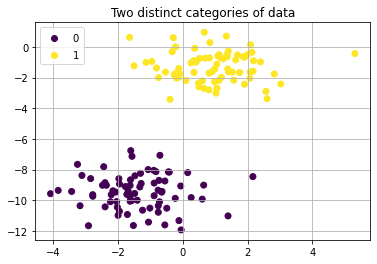

In [201]:
# Plot the linearly separable data
plotter(X_lin, y_lin)

The basic idea behind the perceptron can be notated as follows. There are different ways of doing this but they all more or less involve the following idea (taken from Wikipedia:

In the modern sense, the perceptron is an algorithm for learning a binary classifier called a threshold function: a function that maps its input $\mathbf{x}$ (a real-valued vector) to an output value $f(\mathbf{x})$ (a single binary value):


$$
f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0,\\0 & \text{otherwise}\end{cases}
$$

where $\mathbf{w}$ is a vector of real-valued weights, $\mathbf{w} \cdot \mathbf{x}$ is the **dot product** $\sum_{i=1}^m w_i x_i$, where *m* is the number of inputs to the perceptron, and *b* is the ''bias''. The bias shifts the decision boundary away from the origin and does not depend on any input value.

The value of $f(\mathbf{x})$ (0 or 1) is used to classify $\mathbf{x}$ as either a positive or a negative instance, in the case of a binary classification problem. If **b** is negative, then the weighted combination of inputs must produce a positive value greater than $|b|$ in order to push the classifier neuron over the 0 threshold. Spatially, the bias alters the position (though not the orientation) of the decision boundary. 

## Neurons And Logic Gates

Before we start writing an algorithm that implements some of this thinking let's use the idea behdind perceptron of creating an actual computing device that could make distinctions between patterns in an image or clouds of data like this above. "Logic gates" are ideas using in computing even in its early inception. This concept allows us to take inputs (in the form of an electrical signal) and compare them in some way to produce an output which in turn could be used as an input to another "logic gate" and so on. This allows us to perform computations. We could implement a perceptron using logic gates.

We will also designate a domain from which our data will emerge. It will be restricted to inputs being either 0 or 1 and outputs also being 0 or 1. We could consider 0 as representing a decision not to activate a signal whereas a 1 would be a decision to activate a signal. The thinking is along the same lines of the neuron in the human brain wherin a charge passes through a neuron and  a decision is made whether to activate and send a signal to the next neuron and so on.  

<img src="./PICS/02_neuron.png" style="height: 300px;">




So the input signals can be represented by an input vector **x**. Those signals might not all be at the same level of intensity which could be represented by another vector called **w** which represents the relative weights associated with each of the inputs. 

We could choose to **sum** the incoming signals (perhaps multiplying each by its repsective weight) and making a determination if the sum exceeds a threshold. If that sum matches or exceeds that threshold then we activate or fire the neuron. That threshold can be notated as **b** for **bias**. The notation below has it as a **1** but we could just as easily incliude a **b**. So do you remember this?

$$
f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0,\\0 & \text{otherwise}\end{cases}
$$

We could then pass the previosuly mentioned sum into this function which is known as an activation function. I think you can put it together that **activation** in this sense relates to the biological neuron **choosing** to **activate** a signal based on input which would result in a charge being moved "down the line" so to speak. Remember, the **x** vector represents electrical signals and the **w** vector represents weights on the **x** vector elements. What the magnitute of these are, and how they are originally initialized, is something we will later explore. We could visualize a Perceptron like this:

<img src="./PICS/03_perceptron.png" style="height: 300px;">

https://www.simplilearn.com/tutorials/deep-learning-tutorial/perceptron


- “w” = vector of real-valued weights (usually "1" in perceptrons)
- “b” = bias (an element that adjusts the boundary away from origin without any dependence on the input value)
- “x” = vector of input x values

   $$ \Sigma_{i=1}^{m} x_iw_i + bias $$
   
- “m” = number of inputs to the Perceptron

The activation function is the f(x) function mentioned previously.
$$
f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0,\\0 & \text{otherwise}\end{cases}
$$

This is known as **The Heaviside step function**

<img src="./PICS/07_heavside.png" style="height: 500px;">

## The Need for Activation Functions

The Activation function takes / receives input from the perceptron (there is one only one of them). It performs some kind of calculation and makes a decision to provide an output value that could be then fed to other neurons or it can represent an endpoint value such as a 0 or a 1 value. You could think of the activation function as being a function that helps determine if a neuron "fires" or activates. In this way you could think of the activation function as attenuating or suppressing less influential input neurons (and their weights). 

## The Bias Value

Let's dig a little deeper to better understand what the bias value represents. Let's take a small tangent here to look at a Linear Regression problem. We'll use **sklearn** for this. Let's get 
some data and build a regression model which, in this case, will predict the output Miles Per Gallon for a given car in the data set. 

    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2 



(0.0, 6.0)

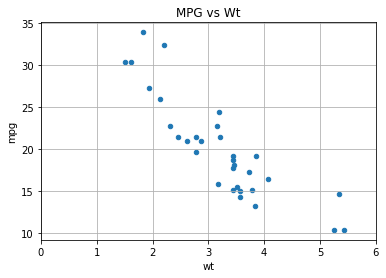

In [146]:
import pandas as pd
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

print(mtcars.head(),"\n")
# We'll preidct the mpg value using all of the other columns

a = mtcars.plot.scatter(x='wt',y='mpg')
plt.title("MPG vs Wt")
plt.grid()
a.set_xlim(0,6)   # set the xlim to left, right

Regression equation coefficients:
 [-5.34447157]

Regression equation intercept: 37.28512616734204


Text(0.5, 1.0, 'mpg ~ wt: Data and Regression Line')

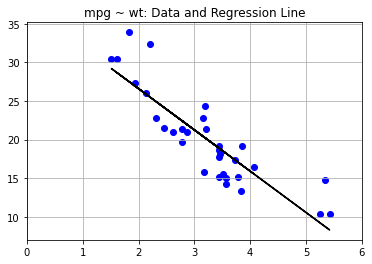

In [442]:
from sklearn.linear_model import LinearRegression
X = mtcars[['wt']]
y = mtcars['mpg']

# Setup a new model
model = LinearRegression()

# fit the model
model.fit(X,y)

# Look at the equation coeeficients 
print("Regression equation coefficients:\n", model.coef_)

# Look at the intercept
print("\nRegression equation intercept:",model.intercept_)

y_pred = model.predict(X)

#fig, ax = plt.subplots(figsize=(12, 6))


plt.scatter(X, y,color='b') 
# Plot the regression line
plt.plot(np.array(X), y_pred,color='k') 
plt.xlim([0,6])
plt.grid()
plt.title("mpg ~ wt: Data and Regression Line")

So what if we plugged in a value of 0 for the weight variable? what value would we get? We would get the intercept value although that does't make total sense. I mean a car with 0 wt might not even be an actual car (interval vs ratio data) but the model assumes a default **bias** of the intercept in absence of other information. So, to counteract this intercept value we might apply a bias of -37.285. This would be a similar approach to what we might do with the 


In [443]:
print(f"wt * {model.coef_} + {model.intercept_} is {0 * model.coef_ + model.intercept_}")

wt * [-5.34447157] + 37.28512616734204 is [37.28512617]


## Some Data

To make things easier to understand, let's plot some very basic data here. Actually we couldn't get much more basic. What we have is some data that corresponds to two different categoies.

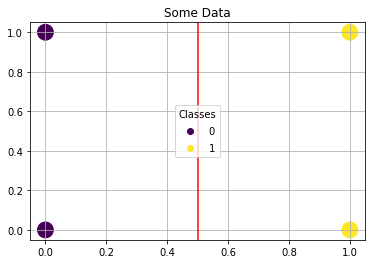

In [444]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame([[0,0,0],[0,1,0],[1,0,1],[1,1,1]],columns=["x1","x2","cat"])
a = plt.scatter(x=df['x1'],y=df['x2'],s=250,c=df['cat'],label=df['cat'])
plt.legend(*a.legend_elements(),
                    loc="center", title="Classes")
plt.grid()
plt.title("Some Data")
plt.axvline(x=0.5, color='red', linestyle='-')

Ask yourself if you can draw a line between the two different categories. It's pretty easy to see that you can. This illustrates the linear separability of the data. In fact, there are multiple lines we could draw but we'll worry about which one is the best for alter on. 

Here is another example of some data that can be separated by a line. It might be better to consider these lines as being **decision boundaries**. Please note that the lines we've drawn here do not necessarily represent the *best* decision boundaries. These are just examples

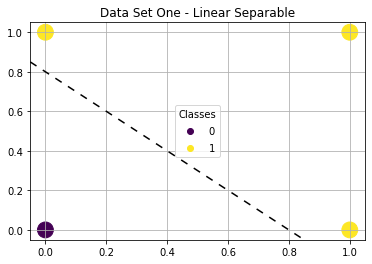

In [445]:
df = pd.DataFrame([[0,0,0],[0,1,1],[1,0,1],[1,1,1]],columns=["x1","x2","cat"])
a = plt.scatter(x=df['x1'],y=df['x2'],s=250,c=df['cat'],label=df['cat'])
plt.legend(*a.legend_elements(),
                    loc="center", title="Classes")
plt.grid()
plt.title("Data Set One - Linear Separable")
plt.axline((0, 0.8), slope=-1, color="black", linestyle=(0, (5, 5)))

## Linearly Inseparable

So let's look at some data that might cause trouble to a simple method such as the Perceptron that assumes the data can be linearly separated.

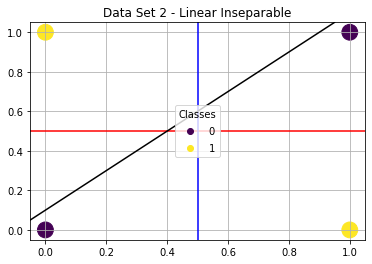

In [446]:
non_lin_sep_df = pd.DataFrame([[0,0,0],[0,1,1],[1,0,1],[1,1,0]],columns=["x1","x2","cat"])
a = plt.scatter(x=non_lin_sep_df['x1'],
                y=non_lin_sep_df['x2'],
                s=250,c=non_lin_sep_df['cat'],label=non_lin_sep_df['cat'])
plt.legend(*a.legend_elements(),
                    loc="center", title="Classes")
plt.grid()
plt.title("Data Set 2 - Linear Inseparable")
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axvline(x=0.5, color='b', linestyle='-')
#plt.axline((0, 0.1), slope=1, color="black", linestyle=(0, (5, 5)))
plt.axline((0, 0.1), slope=1, color="black", linestyle='-')

What about the the above set of data ? Is there a line we could draw to seperate the two categories? The lines above don't do it. We could even draw diagonal line but we still couldn't separate the two categories. But we were talking about logic gates so let's get back to them and how they might help us distinguish between categories. Let's break down the fundamental logical operations using some of the basic data from above - Data Set 1

| x1 | x1 | y |
|----|----|---|
| 0  | 0  | 0 | 
| 0  | 1  | 1 |
| 1  | 0  | 1 |
| 1  | 1  | 1 |

Here we consider the **y** column to represent the categories of 1 or 0. In biomedical datasets these are typically considered as an event (1) and non-event (0) or a case (1) vs control (0). In so called Boolean logic the 1 could be considered as True whereas the 0 is False. So let's handle the first of logic function which takes a single argument. 

## Using Logic Operators

1) **NOT**: So we have the **NOT** function / gate which negates the input. In boolean logic we would take a **1** for example, give it to the **NOT** gate which would result in a **0** (or False). This is also known as an **inverter**. It takes an input and outputs the opposite value. So **NOT(0)** is 1 just as **NOT(1)** is 0.

<img src="./PICS/05_gates.png" style="height: 100px;">

https://www.slideserve.com/carnig/basic-logic-gates

And then we have two more basic gate functions which will figure heavily in the perceptron realim: **AND**, **OR**.

2) **AND**: The **AND** function takes two arguments, e.g. **AND(1,0)** and returns a 1 (True) if and only if both arguments are 1 (True). So **AND(1,1)** returns 1, **AND(0,0)** returns 0. 

3) **OR**: The **OR** function takes two arguments, e.g. **OR(1,0)** and returns a 1 if one of the arguments is 1. So **OR(0,0)** returns 0, **OR(0,1)** returns 1, **OR(1,1)** returns 1

4) **XOR**: There is also the **XOR** gate which does something interesting in that it will return a 1 if and only if exactly one of the arguments if 1. So **XOR(1,1)** is 0 whereas **XOR(1,0)** is 1. 


We can also do things like composite gates: 

- AND(0,NOT(1)) = 0
- OR(1,NOT(0)) = 1
- AND(NOT(1),AND(1,0)) = 0

Let's summarize:

<img src="./PICS/04_gates.png" style="height: 200px;">

Could we implement some (or all) of these gates in Python? Yes. In fact there are modules which you can install which will do this for you. But we don't need to. Let's look at the followinf data:


Text(0.5, 1.0, 'Some Data to be Modled by OR')

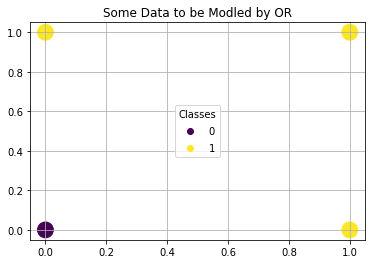

In [447]:
lin_sep_df = pd.DataFrame([[0,0,0],[0,1,1],[1,0,1],[1,1,1]],columns=["x1","x2","cat"])
a = plt.scatter(x=lin_sep_df['x1'],y=lin_sep_df['x2'],s=250,c=lin_sep_df['cat'],label=lin_sep_df['cat'])
plt.legend(*a.legend_elements(),
                    loc="center", title="Classes")
plt.grid()
plt.title("Some Data to be Modled by OR")
#plt.axline((0, 0.8), slope=-1, color="black", linestyle=(0, (5, 5)))

### Implement an OR Gate

So how could we implement a perceptron to make a decision boundary on the above data. So remember that weare implementing the activation function, perceptron, and the OR operation using Python. We will simplify the peceptron architecture as follows:

<img src="./PICS/08_percep.png" style="height: 200px;">
https://glowingpython.blogspot.com/2011/10/perceptron.html

Note that we will omit the bias for now. Don't worry. it's not critical here. The key is that we multiply our x values by the weights, sum them, and then feed them through the Step function which will return either a 0 or a 1. 

In [25]:
# See https://medium.com/towards-data-science/perceptrons-logical-functions-and-the-xor-problem-37ca5025790a
# Much of this is taken from the above link

import numpy as np

def unit_step(input):
    """ Heavyside Step function. v must be a scalar """
    if input >= 0:
        return 1
    else:
        return 0

def perceptron(x, w, b):
    """ Implement the perceptron """
    v = np.dot(w, x) + b
    y = unit_step(v)
    return y

def OR_percep(x):
    """ Set some weights and a bias """
    w = np.array([1, 1])
    b = -0.5
    return perceptron(x, w, b)

The only thing here that might not yet be clear is that we are implementing the OR operation using weights of [1,1] and a bias of -0.5. Why are we doing that? Well if you look at the data:

In [449]:
lin_sep_df

,x1,x2,cat
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


We are providing weight and bias values that would allow each row to produce the appropriate category. There are multiple solutions to this but if we multipled each row by [1,1] and add a -0.5 we will get the following values:

In [450]:
weights = [1,1]
bias = -0.5

outlist = []
for idx, row in lin_sep_df.iterrows():
    print(f"X row {idx}: {np.array(row[0:2])} weights: {weights} bias: {bias}, output: {np.dot(weights,row[0:2])+bias} )")
    outlist.append(np.dot(weights,row[0:2])+bias)

X row 0: [0 0] weights: [1, 1] bias: -0.5, output: -0.5 )
X row 1: [0 1] weights: [1, 1] bias: -0.5, output: 0.5 )
X row 2: [1 0] weights: [1, 1] bias: -0.5, output: 0.5 )
X row 3: [1 1] weights: [1, 1] bias: -0.5, output: 1.5 )


If we then filter these through the step function we would get 0, 1, 1, 1, which matches what we get back from an OR operation.

In [451]:
#[categories for categories in unit_step(np.array(outlist))]
unit_step_v = np.vectorize(unit_step)
unit_step_v(outlist)

array([0, 1, 1, 1])

In [452]:
# Test
example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

print("OR({}, {}) = {}".format(1, 1, OR_percep(example1)))
print("OR({}, {}) = {}".format(1, 0, OR_percep(example2)))
print("OR({}, {}) = {}".format(0, 1, OR_percep(example3)))
print("OR({}, {}) = {}".format(0, 0, OR_percep(example4)))

lin_sep_df

OR(1, 1) = 1
OR(1, 0) = 1
OR(0, 1) = 1
OR(0, 0) = 0


,x1,x2,cat
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


### AND Logic Gate

What does this mean? We can implement a perceptron that matches the OR operation which means that OR operations can linealry separate data assuming it is separable. But we can also do this with the AND operator with some minor adjustments.


In [453]:
def AND_percep(x):
    w = np.array([1, 1])
    b = -1.5
    return perceptron(x, w, b)

# Test
example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

print("AND({}, {}) = {}".format(1, 1, AND_percep(example1)))
print("AND({}, {}) = {}".format(1, 0, AND_percep(example2)))
print("AND({}, {}) = {}".format(0, 1, AND_percep(example3)))
print("AND({}, {}) = {}".format(0, 0, AND_percep(example4)))

AND(1, 1) = 1
AND(1, 0) = 0
AND(0, 1) = 0
AND(0, 0) = 0


So it turns out that **sklearn** has a Percepton estimator. Let's check it out.

In [476]:
#create perceptron object
classifier = Perceptron(max_iter=40, tol=1e-3)

ORlabels = [0,1,1,1]
classifier.fit(lin_sep_df[['x1','x2']], ORlabels)

# Predict the label
print(f"Prediction: {classifier.predict(lin_sep_df[['x1','x2']])}")
print(f"OR Labels: {ORlabels}")

print(classifier.score(df[['x1','x2']], ORlabels))
#output of 1.0 indicates that 100% of the time, model was able to correctly determine output given data


Prediction: [0 1 1 1]
OR Labels: [0, 1, 1, 1]
1.0


## Non Linear Separable Data

So now what might happen if we wanted to use the non-linear separable data against which we would implement one of the above logic gates. So consider this data from before:

   x1  x2  cat
0   0   0    0
1   0   1    1
2   1   0    1
3   1   1    0


Text(0.5, 1.0, 'Data Set 2 - Linear Inseparable')

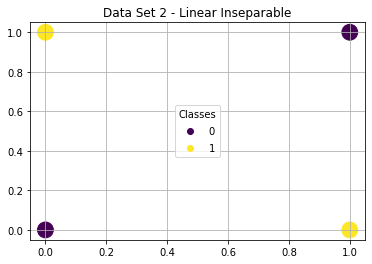

In [319]:
a = plt.scatter(x=non_lin_sep_df['x1'],
                y=non_lin_sep_df['x2'],
                
                
plt.grid()
plt.title("Data Set 2 - Linear Inseparable")


### Current Methods Don't Work

Notice the labels which are 0, 1, 1, 0 yet we cannot get either the OR or AND operator to produce the correct labels. What can we do?

In [321]:
# Try the AND operator
example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

print("AND({}, {}) = {}".format(1, 1, AND_percep(example1)))
print("AND({}, {}) = {}".format(1, 0, AND_percep(example2)))
print("AND({}, {}) = {}".format(0, 1, AND_percep(example3)))
print("AND({}, {}) = {}\n".format(0, 0, AND_percep(example4)))

print("Let's try the OR operator \n")

# Try the OR operator
print("OR({}, {}) = {}".format(1, 1, OR_percep(example1)))
print("OR({}, {}) = {}".format(1, 0, OR_percep(example2)))
print("OR({}, {}) = {}".format(0, 1, OR_percep(example3)))
print("OR({}, {}) = {}\n".format(0, 0, OR_percep(example4)))

print("They don't work \n")


AND(1, 1) = 1
AND(1, 0) = 0
AND(0, 1) = 0
AND(0, 0) = 0

Let's try the OR operator 

OR(1, 1) = 1
OR(1, 0) = 1
OR(0, 1) = 1
OR(0, 0) = 0

They don't work 



### Introducing XOR

Neither of these will work. We would have to implement another technique or perphaps employ a combination of the other logical functions. It turns out that we can handle the non-linear separable data by using a combination. It's not immediately obvious. This also involves adding in more nodes to what would ordinarily be a single perceptron which is why, in large part, perceptrons were abandoned for quite some time. 

<img src="./PICS/09_xor.png" style="height: 300px;">

In [317]:
# check the data
non_lin_sep_df

,x1,x2,cat
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


So let's process each row by hand using the above architectue:

```
XOR(0,0) = AND(NOT(AND(0,0)),OR(0,0))
         = AND(NOT(0),0)
         = AND(1,0)
         = 0
         
XOR(0,1) = AND(NOT(AND(0,1)),OR(0,1))
         = AND(NOT(0),1)
         = AND(1,1)
         = 1

XOR(0,1) = AND(NOT(AND(0,1)),OR(0,1))
         = AND(NOT(0),1)
         = AND(1,1)
         = 1

XOR(1,1) = AND(NOT(AND(1,1)),OR(1,1))
         = AND(NOT(1),1)
         = AND(0,1)
         = 0

```

In [371]:
def XOR_net(x):
    gate_1 = AND_percep(x)
    gate_2 = NOT_percep(gate_1)
    gate_3 = OR_percep(x)
    new_x = np.array([gate_2, gate_3])
    output = AND_percep(new_x)
    return output

# We'll also need to define a NOR function:
def NOT_percep(x):
	return perceptron(x, w=-1, b=0.5)

print("XOR({}, {}) = {}".format(1, 1, XOR_net(example1)))
print("XOR({}, {}) = {}".format(1, 0, XOR_net(example2)))
print("XOR({}, {}) = {}".format(0, 1, XOR_net(example3)))
print("XOR({}, {}) = {}".format(0, 0, XOR_net(example4)))

XOR(1, 1) = 0
XOR(1, 0) = 1
XOR(0, 1) = 1
XOR(0, 0) = 0


### sklearn Percepton

It turns out that the **sklearn** module provides a Perceptron model for convenience. Let's try it out on the simple data we have been working with. See https://adrian-pardo.github.io/perceptron/ from which most of the following is taken. First let's redefine the dataframe with the points [0,0], [1,0], [0,1], [1,1] We will also create some labels:

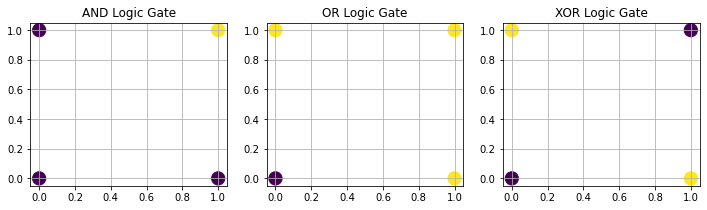

In [480]:
data = pd.DataFrame([[0,0],[0,1],[1,0],[1,1]],columns=["x1","x2"])

#AND, OR, and XOR gate labels
ANDlabels = [0, 0, 0, 1]
ORlabels = [0, 1, 1, 1]
XORlabels = [0, 1, 1, 0]

def plotter(sub,labels,title,size=175):
    plt.subplot(1,3,sub)
    plt.scatter(x=data['x1'], y=data['x2'], 
                c=labels, s=point_size)
    plt.title(title)
    plt.grid()

fig = plt.figure(figsize = (12,3))

plotter(1,ANDlabels,"AND Logic Gate")
plotter(2,ORlabels,"OR Logic Gate")
plotter(3,XORlabels,"XOR Logic Gate")

Next we will create a [Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) which we will use to fit the data to the three sets of labels. The following example is taken from the above link to the Perceptron function to show how easy it is to use:

```python
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)

clf.score(X, y)
```

Of course for our data we will use the **data** dataframe and the various labels we have created.

In [500]:
#create perceptron object
classifier = Perceptron(max_iter=40, tol=1e-3)

#train model, and print accuracy of model on the data points

# Fit the data to the AND Labels
classifier.fit(data, ANDlabels)

score = classifier.score(data, ANDlabels)
print(f"Classifer score for ANDlabels: {score:4.2f}")

# Fit the data to the OR labels
classifier.fit(data, ORlabels)

score = classifier.score(data, ORlabels)

print(f"Classifer score for OR labels: {score:4.2f}")

# Fit the data to the XOR Labels
classifier.fit(data, XORlabels)
score = classifier.score(data[['x1','x2']], XORlabels)

print(f"Classifer score for XORlabels: {score:4.2f}")


Classifer score for ANDlabels: 1.00
Classifer score for OR labels: 1.00
Classifer score for XORlabels: 0.50


The XOR logic gates had an output score of 0.5 which indicates that only 50% of the time the model was able to correctly determine output given data. That's basically making a guess. There is no way to make a decision. To illustrate this point further, consider the following use of the sklearn perceptron estimator which provides methods to do things such as plot a decision boundary - well actually the distance a given point might have from a decision boundary.


/Users/tico/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


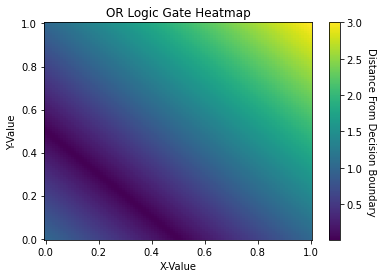

In [501]:
# code taken from https://adrian-pardo.github.io/perceptron/
#create 100 equidistant, ordered pairs

x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)
point_grid = list(product(x_values, y_values))
#point_grid = product(x_values, y_values)

#plot heatmap for OR gate
classifier.fit(data, ORlabels)

distances = classifier.decision_function(point_grid)
abs_distances = [abs(pt) for pt in distances]
distances_matrix = np.reshape(abs_distances, (100,100))

heatmap = plt.pcolormesh(x_values, y_values, distances_matrix)
cbar = plt.colorbar(heatmap)
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
plt.title("OR Logic Gate Heatmap")
cbar.set_label("Distance From Decision Boundary", rotation=270,labelpad=13)
plt.show()


In [502]:
weights = [1,1]
bias = -0.5

for idx, row in df.iterrows():
    print(row[0:2])
    print(np.dot(weights,row[0:2])+bias)

x1    0
x2    0
Name: 0, dtype: int64
-0.5
x1    0
x2    1
Name: 1, dtype: int64
0.5
x1    1
x2    0
Name: 2, dtype: int64
0.5
x1    1
x2    1
Name: 3, dtype: int64
1.5


# Playing Poker

Let's use an analogy to help us better understand what is happening. Note that this material is motivated by Anne Hsu's youtube series at https://www.youtube.com/watch?v=xRRS5c1GT6Q 
If we wanted to develop a perceptron approach to determine if someone was bluffing at poker we could do so but only if it's a limited number of conditions that constituted a "bluff". 

In a poker game, a "bluff" is when a player projects the idea, via betting or body language, that his hand is much stronger than it actually is. The bluffer then hopes that other players actually believe this as being true in which case they might choose to "fold" (abandon their playing activity for that round) which would leave the "pot" (the accumulated money for that round) for the bluffer. Some people do not believe the bluffer in which case they might raise the bet to get the bluffer to contribute more money to the pot. Some people might do the reverse bluff wherein they project the idea that their hand is weaker than it actually is to get other players to bet aggressively. 

In any case, it's been demonstrated time and again that those who "bluff" can also unconsciusly exhibit unintended signals that they are bluffing which, in essence, is a form of lying. This could be a facial tic such as rapid eye blinking, blushing, moving the lips, smiling, frowning or become more pale. The best bluffers exhibit nothing obvious. Many poker players will wear hats, sunglasses wigs and jewelry to make it more difficult to pickup on when they are bluffing. Like this guy:

<img src="./PICS/brain_scans.png" style="height: 500px;">

http://inkfish.fieldofscience.com/2012/07/brain-scans-predict-when-poker-players.html


## Bluffing Strategies

Notice how this guy is hiding his face with sunglasses and a hoodie. This is not uncommon in poker playing although some poker players think this is amateurish and not professional. But no one really agrees. The point is that enough people do it that it is part of the actual game. So either you accept it and learn to play or maybe learn to bluff !

- rapid eye movements
- blusing
- smiling
- frowning
- fidgeting
- tapping fingers on the table
- shifting position while seated

Now how does any of this relate to what we are doing? Well it turns out that there are some important linkages. We could measure or at least estimate things like the skin tone of someone to see if it fluctuates when the person is bluffing. Depending on the skin tone this could be easy say if someone was naturally pale then the blush response might indicate excitement (or fear) in which case other players could use that to determine if the person is bluffing. Or, we could also look at whether the person is smiling or frowning and to what extent. Multiple interpretations are possible.

<img src="./PICS/bluff_table.png" style="height: 500px;">


So the above looks like something we've seen before except we now have attributes ("features") asssociated with the matrix. We could say, for example, that the skin blush is either red or not (1 or 0) and the degree of smile is either yes or no (1 or 0). We could then perhaps implement our logic gates from above. We don't need to walk through the implementation again to make the following observations:

So here if we assume someone is bluffing if they are smiling AND have a red face, we could handle this with the following. Note that the checkmark represents a bluff (1).

<img src="./PICS/red_and_smiling.png" style="height: 400px;">

So here if we assume someone is bluffing if they are smiling OR have a red face, we could handle this with the following. Note that the checkmarks represent a bluff (1)

<img src="./PICS/red_or_smiling.png" style="height: 400px;">


## Non Linearly Separable 

So the above two situations indicate linear separability. However, we could not handle the situation wherein a person is bluffing if they are smiling or blushing BUT not both.


<img src="./PICS/blush_smile_xor.png" style="height: 400px;">

## Solution

So we can implement a solution as descibed above. We can use our logical gates here to get what we need which in this case is to get the XOR operated implemented. Remember that XOR is a special form of the OR operator. So the OR operator OR(x1, x2) would be TRUE (1) if either x1 or x2 is 1. XOR(x1, x2) would be TRUE (1) if one of x1, x2 is TRUE (1) but not the other. To review:

```
OR(1,1) = 1
OR(1,0) = 1
OR(0,1) = 1
OR(0,0) = 0

XOR(1,1) = 0
XOR(0,1) = 1
XOR(1,0) = 1
XOR(0,0) = 0
```

<img src="./PICS/three_neuron.png" style="height: 400px;">

<img src="./PICS/xor_multi.png" style="height: 400px;">



smiling OR Red|  | 
---|---|
0 | 1 |
1 | 1 | 


smiling AND Red|  | 
---|---|
0 | 0 |
0 | 1 | 


NOT(smiling AND Red)|  | 
---|---|
1 | 1 |
1 | 0 | 


# A Real Example

Let's see how the perceptron performs in a real example. By this I mean an example with other data. In our previous examples we found numbers for the weights such that when they are multipled by the X values and summed through the activation function they produce the desired output. But how does that work in practice? This will give us a glimpse into how we might extend this approach to multi-layer perceptrons. So let's go back to some basic data

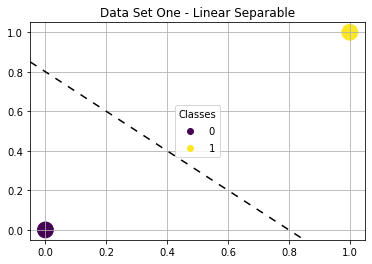

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.DataFrame([[0,0,0],[1,1,1]],columns=["x1","x2","y"])
a = plt.scatter(x=data['x1'],y=data['x2'],s=250,c=data['y'],label=data['y'])
plt.legend(*a.legend_elements(),
                    loc="center", title="Classes")
plt.grid()
plt.title("Data Set One - Linear Separable")
plt.axline((0, 0.8), slope=-1, color="black", linestyle=(0, (5, 5)))


In [214]:
weights = np.array([0.,0.])
lr = 0.5
bias = 0.0
outlist = []


#data = pd.DataFrame([[0,0,0],[1,1,1]],columns=["x1","x2","y"])
#data = pd.DataFrame([[0,0,0],[0,1,1],[1,0,1],[1,1,1]],columns=["x1","x2","cat"])

# Linear inseparable
#data = pd.DataFrame([[0,0,0],[0,1,1],[1,0,1],[1,1,0]],columns=["x1","x2","cat"])

# A line data set
data = pd.DataFrame([[0,0,0],[1,1,1]],columns=["x1","x2","y"])


hold = np.array(data)
i = 1

# Repeat as many times as necessary to converge
# on a solution. Note that this will not work for
# non-linearly separable data

while (True):
    
    # Set mis classification variable to 0
    m = 0
    
    # This slows things down
    time.sleep(1)
    
    # What Epoch are we in?
    print(f"Epoch number {i}")
    
    # Process each row in the data frame / matrix
    for row in hold:
        
        # Pick out the X1 and X2 and the associated y label
        X = row[0:2]
        y = row[2:3]
        
        # Get the dot product of X and the weights plus the bias
        # Then feed that into our activation function we previously defined
        yhat = unit_step(np.dot(X,weights)+bias)
        diff = y - yhat
        print(f"X {np.array(X)} Actual {y[0]} Predicted: {yhat} Weights: {weights} Bias: {bias})")
        
        # Check for a misclassification
        if y != yhat:
            weights +=  lr*diff*X
            bias    +=  lr*diff
            m       +=  1
            outlist.append(yhat)
        
    # Increment Epoch Number
    print(f"\nI saw {m} misclassifications \n")
    i += 1
    print("\n")
    
    if m == 0:
        break
    


Epoch number 1
X [0 0] Actual 0 Predicted: 1 Weights: [0. 0.] Bias: 0.0)
X [1 1] Actual 1 Predicted: 0 Weights: [0. 0.] Bias: [-0.5])

I saw 2 misclassifications 



Epoch number 2
X [0 0] Actual 0 Predicted: 1 Weights: [0.5 0.5] Bias: [0.])
X [1 1] Actual 1 Predicted: 1 Weights: [0.5 0.5] Bias: [-0.5])

I saw 1 misclassifications 



Epoch number 3
X [0 0] Actual 0 Predicted: 0 Weights: [0.5 0.5] Bias: [-0.5])
X [1 1] Actual 1 Predicted: 1 Weights: [0.5 0.5] Bias: [-0.5])

I saw 0 misclassifications 





So the last set of weights are (0.5, 0.5) and the Bias is (-0.5). We can draw a separating line on the data if we wish. We just need to compute the slope and intercept. See this page https://www.thomascountz.com/2018/04/13/calculate-decision-boundary-of-perceptron for information on how this information can be derived.

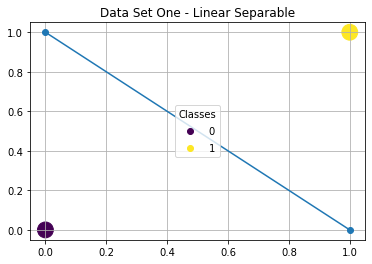

In [219]:
# Setup a function to get the y value associated with an x value
def sep_line(weights, bias, x):
    y = (-(bias / weights[1]) / (bias / weights[0]))*x + (-bias / weights[1])
    return y[0]

sep_line(weights,bias,1)

a = plt.scatter(x=data['x1'],y=data['x2'],s=250,c=data['y'],label=data['y'])
plt.legend(*a.legend_elements(),
                    loc="center", title="Classes")
plt.grid()
plt.title("Data Set One - Linear Separable")

#plt.axline((0, 0.8), slope=-1, color="black", linestyle=(0, (5, 5)))
x = [0,1]
y = [sep_line(weights,bias,x[0]),sep_line(weights,bias,x[1])]
plt.plot(x,y, marker = 'o')

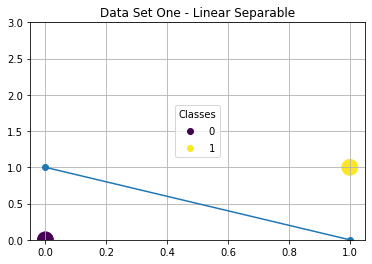

In [218]:
a = plt.scatter(x=data['x1'],y=data['x2'],s=250,c=data['y'],label=data['y'])
plt.legend(*a.legend_elements(),
                    loc="center", title="Classes")
plt.grid()
plt.title("Data Set One - Linear Separable")
plt.ylim(0,3)
#plt.axline((0, 0.8), slope=-1, color="black", linestyle=(0, (5, 5)))
weights = np.array([0.5,0.5])
bias = np.array([-0.5])
x = [0,1]
y = [sep_line(weights,bias,x[0]),sep_line(weights,bias,x[1])]
plt.plot(x,y, marker = 'o')

We previously addressed this data using the AND logic gate. The appropriate coefficients were: [1,1] and a bias of -1.5. Actually this isn't the only solution but it works. Remember what the Perpcetron looks like:

<img src="./PICS/08_percep.png" style="height: 200px;">

In [541]:
# Remember this from before?
def perceptron(x, w, b):
    """ Implement the perceptron """
    v = np.dot(w, x) + b
    y = unit_step(v)
    return y


In [96]:
weights = [1,1]
bias = -1.5
outlist = []
for idx, row in lin_sep_df.iterrows():
    print(f"X row {idx}: {np.array(row[0:2])} weights: {weights} bias: {bias}, output: {np.dot(weights,row[0:2])+bias} )")
    outlist.append(np.dot(weights,row[0:2])+bias)

X row 0: [0 0] weights: [1, 1] bias: -1.5, output: -1.5 )
X row 1: [0 1] weights: [1, 1] bias: -1.5, output: -0.5 )
X row 2: [1 0] weights: [1, 1] bias: -1.5, output: -0.5 )
X row 3: [1 1] weights: [1, 1] bias: -1.5, output: 0.5 )


In [97]:
#[categories for categories in unit_step(np.array(outlist))]
unit_step_v = np.vectorize(unit_step)
unit_step_v(outlist)

array([0, 0, 0, 1])

In [98]:
# Or more directly
unit_step_v(np.dot(np.array([1,1]),np.array(data).T)+bias)

ValueError: shapes (2,) and (3,2) not aligned: 2 (dim 0) != 3 (dim 0)

<img src="./PICS/algo.png" style="height: 350px;">

So we can not write Python code to implement this. It's not difficult and there are various implementations of it out on the Internet.

In [545]:
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [99]:
weights = np.array([0,0])
lr = 0.5
bias = 0

In [100]:
import time
weights = np.array([0.,0.])
lr = 0.5
bias = 0.0
outlist = []


data = pd.DataFrame([[0,0,0],[1,1,1]],columns=["x1","x2","y"])
#lin_sep_df = pd.DataFrame([[0,0,0],[0,1,1],[1,0,1],[1,1,1]],columns=["x1","x2","cat"])

#data = pd.DataFrame([[0,0,0],[0,1,1],[1,0,1],[1,1,1]],columns=["x1","x2","y"])

#hold = np.array(data)
hold = np.array(lin_sep_df)
i = 1

while (True):
    m = 0
    
    # This slows things down
    time.sleep(2)
    print(f"Epoch number {i}")
    
    # Process each row in the data
    for row in hold:
        
        yhat = unit_step(np.dot(weights.T,row[0:2])+bias)
        d = row[2:3] - yhat
        print(f"X {np.array(row[0:2])} weights: {weights} bias: {bias}, Actual {row[2:3]} Predicted: {yhat} )")
        
        weights +=  lr*d*row[0:2]
        bias    +=  lr*d
        m       +=  1
        outlist.append(yhat)
        
    # Increment Epoch Number
    i += 1
    print("\n")
    
    if m == 0:
        break
    


Epoch number 1
X [0 0] weights: [0. 0.] bias: 0.0, Actual [0] Predicted: 1 )
X [0 1] weights: [0. 0.] bias: [-0.5], Actual [1] Predicted: 0 )
X [1 0] weights: [0.  0.5] bias: [0.], Actual [1] Predicted: 1 )
X [1 1] weights: [0.  0.5] bias: [0.], Actual [1] Predicted: 1 )


Epoch number 2
X [0 0] weights: [0.  0.5] bias: [0.], Actual [0] Predicted: 1 )
X [0 1] weights: [0.  0.5] bias: [-0.5], Actual [1] Predicted: 1 )
X [1 0] weights: [0.  0.5] bias: [-0.5], Actual [1] Predicted: 0 )
X [1 1] weights: [0.5 0.5] bias: [0.], Actual [1] Predicted: 1 )


Epoch number 3
X [0 0] weights: [0.5 0.5] bias: [0.], Actual [0] Predicted: 1 )
X [0 1] weights: [0.5 0.5] bias: [-0.5], Actual [1] Predicted: 1 )
X [1 0] weights: [0.5 0.5] bias: [-0.5], Actual [1] Predicted: 1 )
X [1 1] weights: [0.5 0.5] bias: [-0.5], Actual [1] Predicted: 1 )


Epoch number 4
X [0 0] weights: [0.5 0.5] bias: [-0.5], Actual [0] Predicted: 0 )
X [0 1] weights: [0.5 0.5] bias: [-0.5], Actual [1] Predicted: 1 )
X [1 0] weigh

KeyboardInterrupt: 

In [154]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
# Dataframes are good when you want to plot stuff
# Arrays are better when you want to compute stuff

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))